In [61]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("../data/data.csv", sep=",")

X = df.loc[:, df.columns != "is_alarm"]
y = df["is_alarm"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(n_jobs=1, max_iter=500)
model.fit(X_train, y_train)

with open('logistic-regression.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

y_pred = model.predict(X)

accuracy = accuracy_score(y, y_pred)

print(f"Accuracy: {accuracy:.2%} ({accuracy})", end="\n\n")

feature_weights = model.coef_
feature_weights_mapping = pd.DataFrame(
    {
        "feature": [i for i in list(df.columns) if i != "is_alarm"],
        "weight": feature_weights[0],
    }
)
feature_weights_mapping = feature_weights_mapping.sort_values(
    by=["weight"], ascending=False
).head(20)
print("Top 20 features:")
print(feature_weights_mapping)

Accuracy: 90.13% (0.9012803179173349)

Top 20 features:
                feature    weight
109  global_alarm_count  0.334005
110     events_last_24h  0.300736
5        hour_windspeed  0.013699
3             hour_temp  0.006731
4           hour_precip  0.005980
108           dvornikov  0.003740
1          day_datetime  0.003276
55                lapin  0.002393
15                  men  0.001768
48                 mdco  0.001745
14                   ir  0.001580
24              nuclear  0.001423
16                  lym  0.001320
83                 spac  0.001303
39                 crit  0.000691
82                soled  0.000605
17               shoigu  0.000604
11               svatov  0.000574
86             kupyansk  0.000416
31                 dron  0.000038


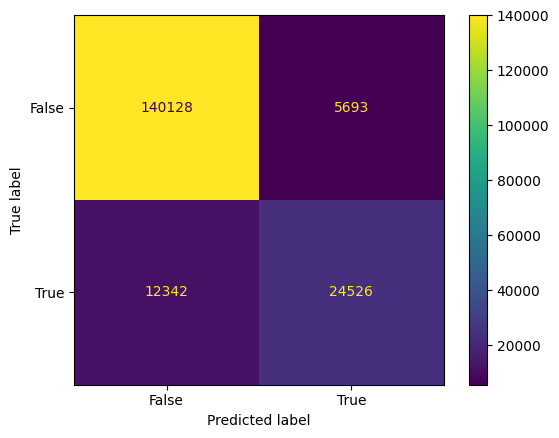

In [62]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()